In [6]:
function create_neighbours(initial_string,infrequents = Set())
    """
    Input_params:  
    initial_string(str): An initial string, which is concatenated with 'A','C','T','G' to  create a bigger motif.
    infrequents(Set): A set of infrequent motifs, that is used for pruning prefixes which are of low frequency. 
    
    Returns
    next_neighbours(str): A list of potential motifs, by extending the initial string. 
    
    Example:
    
    create_neighbours("AC",infrequents) :
        if "AC" or any of its prefixes are not in the infrequent set:
            returns  ["ACA","ACG","ACC","ACT"]
        else:
            returns []
    """
    next_neighbours  =  []  
    flag = 1
    for i in range(1,length(initial_string))
        if initial_string[1:i] in infrequents
            flag = 0
            break
        end
    end
    if flag==0
       return [] 
    end
    for next_chr in ["A","C","T","G"]
        next_initial_string = initial_string*next_chr
        push!(next_neighbours,next_initial_string)
    end
    return next_neighbours
end

create_neighbours (generic function with 2 methods)

In [7]:
function branch_and_bound_helper(input_str,starting_mofits,goal,l,answers,infrequents = Set())
    """
    Input_params:  
    Input_str (list) : The input DNA sequence from which motifs are to be discovered
    starting_motifs(list): The list of starting motifs that is used to create longer neighbours 
    goal(int): The hamming distance to be considered for the no of mismatches allowed
    answers(list): The list of all possible motifs that is found by the program execution
    infrequents(Set): A set of infrequent motifs, that is used for pruning prefixes which are of low frequency. 
    
    """
    next_adjacent_neighbours = []
    for next_neighbours in starting_mofits
        v = create_neighbours(next_neighbours)
        if length(v)!=0
            push!(next_adjacent_neighbours,v)
        end
    end
    next_adjacent_neighbours = [y for item in next_adjacent_neighbours for y in item]
    new_motifs = []
    for potential_motif in next_adjacent_neighbours
        if is_motif_valid(input_str,potential_motif,goal)==false
            push!(infrequents,potential_motif)
        elseif  length(potential_motif)==l
            push!(answers,potential_motif)
        else
            push!(new_motifs,potential_motif)       
        end
    end
                
    if length(next_adjacent_neighbours)>=1 && length(next_adjacent_neighbours[1]) < l
        branch_and_bound_helper(input_str,new_motifs, goal, l, answers,infrequents)
    end
                
                
    return
                
end

                
function validate_by_hamming_distance(string, motif, goal )
    string_motifs = get_all_substrings(string, length(motif))
    for curr_motif in string_motifs
        error =  calculate_hamming_distance(curr_motif, motif)
        if error <= goal
            return true
        end
    end
    return false
end


function is_motif_valid(input_strings, motif, goal=1 )
    for string in input_strings
        if validate_by_hamming_distance(string, motif, goal) == false
            return false
        end
    end
    return true
end

            
function get_all_substrings(string, l)
    substrings = []
    for start in 1:length(string)-l+1
        push!(substrings, string[start:start+l-1])
    end
    return substrings
end

            
function calculate_hamming_distance(string, motif)
    error = 0
    for i in 1:length(motif)
        if string[i] != motif[i]
            error += 1
        end
    end
    return error
end


calculate_hamming_distance (generic function with 1 method)

In [9]:
function branch_and_bound(input_str,hamming_distance,motif_desired_length)
   """ 
   Input params:
   input_str(list) : The input DNA sequence from which motifs are to be calculated.
   hamming_distance(int): The hamming distance allowed between the concensus string and the different motifs. 
   motif_desired_length(int): The size of motifs that is supposed to be calculated. 
    
   Returns:
   answers(list): The list of possible answers found for the particular configuration(hamming_distance,motif_desired_length)
    
   """
   starting_motifs = create_neighbours("")
   answers = []
   branch_and_bound_helper(input_str,starting_motifs,hamming_distance,motif_desired_length,answers)
   return answers
    
end



branch_and_bound (generic function with 1 method)

In [3]:
using Random
function create_artificial_sequence_with_motifs(n,l,motif_length,no_of_motifs,motifs)
    """
    input_params:
        n(int) The no of dna sequences to be generated
        l(int) The length of each dna sequence
        motif_length(int) The length of the motif to be implanted
        no_of_motif(int) The no of motifs to be implanted in each dna
        motifs(list): The list of motifs to be implanted in each dna sequence
    
    Returns:
        r(list): The n*l dna sequences, having artificially implanted motifs in them. 
    
    """
    results = []
    arr = ['A','C','T','G']
    r = []
    for i in 1:n
        results = []
        for k in 1:l-motif_length*no_of_motifs
            idx = rand(1:4) 
            push!(results,arr[idx])
        end
        results = join(results)
        points = Set()
        while length(points)!=no_of_motifs
            idx = rand(1:length(results))
            push!(points,idx)
        end
        sorted_coor = []
        for elem in points
            push!(sorted_coor,elem)
        end
        intial_points = sort(sorted_coor)
        final_string = []
        past = 1
        temp = []
        shuffle!(motifs)
        for i in 1:no_of_motifs
            starts = intial_points[i]
            if past!=starts
                push!(temp,results[past:starts-1])
            end
            push!(temp,motifs[i])
            past = starts
        end
        if past<=length(results)
            push!(temp,results[past:length(results)])
        end
        resulting_string = join(temp)
        push!(r,resulting_string)
    end
    return r
 
end


input_strings = create_artificial_sequence_with_motifs(10,100,5,4,["ACAAG","ACGGC","AACCA","AAGGG"])

10-element Array{Any,1}:
 "ATAAGTCGGGGTGTGGCGAACGCCCATTAAAAGGGAGAATGGCTAACAATGAAACCATTAATGCGTTTGAGTGGAAGCCGTCCACAAGCTCACGGCACGG"
 "AACGGCGTTCGGGCTGACCCTAGGCATGGCCGAGGACAAGCACGCCTATAATTTCGGCCCGCTAAATTACCAGTGCGCTCCGGGTAAGGGAAGAACCAAT"
 "GTGAACAAGACGCGCAGGCTTTAAGGGAGGAGTCAGTATAGTTCAAACCATCGCGGTCAAGTTACGATAGTAGCGTGAGACCCAGCTACGGCGCCAGCAG"
 "TTGACTGACCCTCTGTCAATATTTTGAGACAAGGACTCACCTATCAACCATAACATGGGATAACACGTAGCTCCGTAGAAAAGGGTACGCACGGCAATGA"
 "ATACTTGGGTCACAGGATCCAACAAGGCACGGCAAAGAACCAGTTAAGGGGCCTTTACCCTAGACGAAACGCCATCGATTCGAGGTTGCGTGAGTTAATT"
 "AAGGGGCGTCCACGATAACCAGAAGGACAAGGCCTAACCAGGTAAGTGACGGCGCAGGGTGATAGAGAATTAAAGGCCATCCGCCCCAGCGCCGTCCCTA"
 "TACACCCATGAAGCAACCACCGTATCCAACAGAGCTTTATTACAAGTCTCTTCCTTCGCTCGAACCTCCATCAGAGAAAGGGGTGTGTACGGCAAATAAG"
 "AGTGATTTCGTACGTACGGCGGTCGACAAGATGCAGCTTCTTGCGCTTATTAATTGAGTAGGGCTACGACCTATTCGTTTCGCAAGGGAAACCACGCGAT"
 "ACGTAAACCGCCCTACTTGGAAGGGGTGCCGCACTATCCATCGGCGGTTAGTCCTCGACTTTCCCAACAACCACTGAACGGCTACGGAGTACAAGACAGT"
 "CGGGTTAAGGGTACAACCATCGCACTAACGTTGTAGA

In [4]:
function create_motif(n,l)
    arr = ['A','C','T','G']
    motifs = []
    for i in 1:n
        temp = []
        for k in 1:l
            idx = rand(1:4) 
            push!(temp,arr[idx])
        end
        push!(motifs,join(temp))
    end
    return motifs  
end

function create_artificial_sequence(N,L,no_of_motifs,length_of_motifs)
     motifs = create_motif(no_of_motifs,length_of_motifs)
     sequence = create_artificial_sequence_with_motifs(N,L,length_of_motifs,no_of_motifs,motifs)
     return motifs,sequence
end

implanted_motifs,sequences = create_artificial_sequence(10,100,5,4)
print(implanted_motifs,"\n")
print(sequences,"\n")

Any["GAAA", "TTGT", "CCAG", "AGTA", "GGGG"]
Any["TATTGTTTCTGCCAGAGGCTTTTTGCGTACAGGGGGGAACGATAAGGTGATTTCAAGTAAAGACAAATTGGAAACACTTCTGCTGTGATCTGTAAGCGCA", "GCCGTATCCAGGTCTGAGGGGGCAGTTGTGCTCTGGTTCCTCAAGGAAATCCAGTGCTGAGAGCTCAGTGTAGAATCGTTAGTAGTAGAGCGCCGTTTTA", "TAATATCTGAAAACTCAAGCGTGGAGTAAAGACCGGTGAAAAGGGCTTCCAGGGTTGGGGGCAGTTAAGTTTCCGCGGAGATAAGTTATTTGTTTGTTAT", "ACAGAGGTCCAGGGGAAAGCTTATACTTATTGTTTCGAATAGTCCTGAAATTAGTAACATCCACAGGGGAAATTGAGGTTTTTCATCAAAATCCGTCAAC", "GTTTATTCCTGGCCCACTAAGCGCTTTGTTCCAGGGTATATTTTAGGGGACCACGGAGAGACGCTTTCAGAAAAAACCGAGTAAGTCCCGCGGATAGAGC", "AGTACTATGAAACCCAAGTACAGAGCGAACGGCTCTTTCCAGGGTCAATATTGATTGTGGTGCATTCCAGGTTCCGGGGAGCGGGCTAGGACACAGCCGA", "TGCCCGCGGAAAGTAGGAAAGAACCCAGAGCGCAAGAAGAAGGTTTGCTAGCGTTAGCGCCACAAATGAACTTGTTGTAATCGGGGATGGTCGCTCATGT", "ACTGAATGTTGGAAAGGGCCAGATTATTCTCGGTTCTGAGGATCAAACTTTTGCATGACGCGTATACGTCGGAGAAGGGGGTTGTCTGATTGACAGTATA", "TTGTCCCGAGAAGCGCGTATACGCACTAGAATTGGGATTGTACACGCATTATGGACTAGTATCCAGCTACGAAAAAAGGGGTTTAGTCCTCAACGTTGGC", "TAGGGCCCTCGGAGG

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...


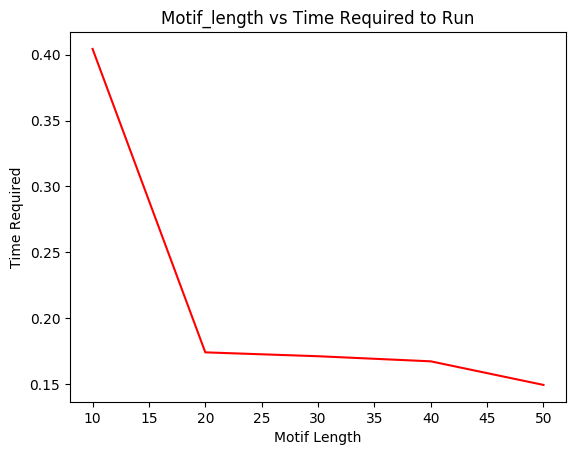

  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99a50ebed0>

In [12]:
Pkg.add("TimerOutputs") 
Pkg.add("PyPlot")
using PyPlot
l,time = [],[]
for i in 1:5
    implanted_motifs,sequences = create_artificial_sequence(10,1000,5,10*i)
    t = @elapsed branch_and_bound(sequences,0,4)
    push!(time,t)
    push!(l,i*10)
end
xlabel("Motif Length")
ylabel("Time Required")
PyPlot.title("Motif_length vs Time Required to Run")
plot(l, time,color="red")
